# Plot remapped OTM results for carbon

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
## Suppress warnings related to division by zero
import warnings
warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import gridspec
from tqdm.notebook import tqdm
from scipy.interpolate import griddata

In [2]:
# Load OTM result

OTMrun='noprior'

OTM_remapped=xr.open_mfdataset(OTMrun+'_remapped.nc')

In [3]:
## Calculate depth integrated fluxes

is2D=False

yr2sec=365.25*24*3600

dC_adj_remapped=OTM_remapped.dC_adj_remapped
dC_Cflux_remapped=OTM_remapped.dC_Cflux_remapped
dC_prior_remapped=OTM_remapped.dC_prior_remapped

if is2D:
    dC_adj_int=dC_adj_remapped
    dC_Cflux_int=dC_Cflux_remapped
else:
    dC_adj_int=(dC_adj_remapped*OTM_remapped.drF).sum('k')
    dC_Cflux_int=(dC_Cflux_remapped*OTM_remapped.drF).sum('k')
    dC_prior_int=(dC_prior_remapped*OTM_remapped.drF).sum('k')

lat=OTM_remapped.YC.values.flatten()
lon=OTM_remapped.XC.values.flatten()
lon[np.where(lon>180)]=lon[np.where(lon>180)]-360

(LAT,LON)=np.meshgrid(np.arange(-90,90),np.arange(-180,180))

dC_OTM_interp=griddata((lon,lat),(dC_prior_int+dC_adj_int).values.flatten(),(LON,LAT))
dC_Cflux_interp=griddata((lon,lat),dC_Cflux_int.values.flatten(),(LON,LAT))
dC_prior_interp=griddata((lon,lat),dC_prior_int.values.flatten(),(LON,LAT))

dC_OTM_flux=dC_OTM_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
dC_Cflux_flux=dC_Cflux_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
dC_prior_flux=dC_prior_interp/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
             

In [4]:
# Sanity check total carbon change

display(((dC_prior_int+dC_adj_int)*OTM_remapped.rA).values.sum())
display((dC_Cflux_int*OTM_remapped.rA).values.sum())

3.2192496e+18

1.5783304e+18

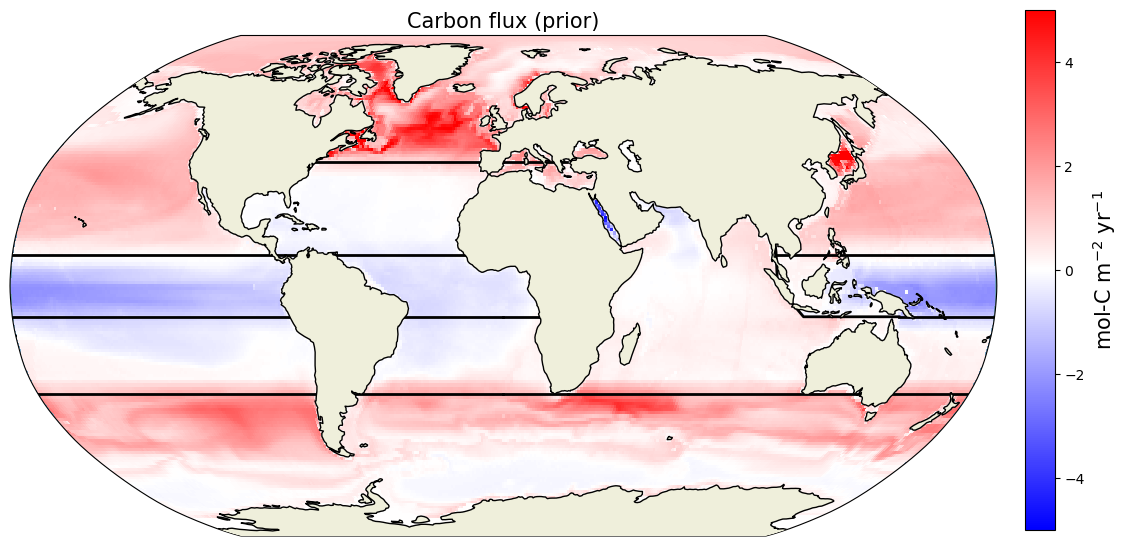

In [5]:
## Plot prior flux

fig  = plt.figure(figsize = (15, 6.5))
gs = gridspec.GridSpec(1,1)
gs.update(wspace = 0.4, hspace=0)
fs=15

ax1 = plt.subplot(gs[0,0], projection=ccrs.Robinson(central_longitude=0))
minv, maxv = 0,8

ax1.stock_img()
ax1.coastlines(zorder=101)

## SECTIONS
# Pacific Sector
ax1.plot([145,300],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([145,300],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([100,280],[10,10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')

# Indian Sector
ax1.plot([25,145],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([145,110,100,100],[-10,-10,0,20], transform = ccrs.PlateCarree(), linewidth = 2, color='black')

# Atlantic Sector
ax1.plot([300,360],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([300,360],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([280,360],[10,10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([280,360],[40,40], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[40,40], transform = ccrs.PlateCarree(), linewidth = 2, color='black')


ax1.pcolormesh(LON, LAT, dC_prior_flux, transform = ccrs.PlateCarree(), vmin=-5, vmax=5, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
plt.title('Carbon flux (prior)',fontsize=fs)
cax = fig.add_axes([0.86, 0.12, 0.02, 0.8])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(-5, 5)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)


#plt.savefig(OTMrun+'_priors_remapped.png', bbox_inches='tight', dpi=300, transparent=True)

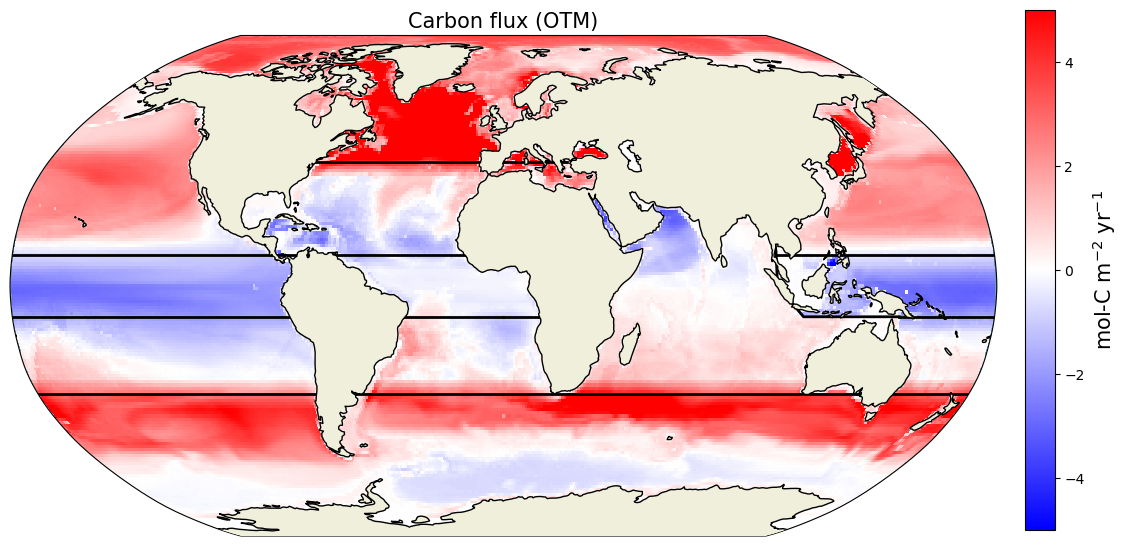

In [6]:
## Plot OTM flux

fig  = plt.figure(figsize = (15, 6.5))
gs = gridspec.GridSpec(1,1)
gs.update(wspace = 0.4, hspace=0)
fs=15

ax1 = plt.subplot(gs[0,0], projection=ccrs.Robinson(central_longitude=0))
minv, maxv = 0,8

ax1.stock_img()
ax1.coastlines(zorder=101)

## SECTIONS
# Pacific Sector
ax1.plot([145,300],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([145,300],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([100,280],[10,10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')

# Indian Sector
ax1.plot([25,145],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([145,110,100,100],[-10,-10,0,20], transform = ccrs.PlateCarree(), linewidth = 2, color='black')

# Atlantic Sector
ax1.plot([300,360],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([300,360],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([280,360],[10,10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([280,360],[40,40], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[40,40], transform = ccrs.PlateCarree(), linewidth = 2, color='black')


ax1.pcolormesh(LON, LAT, dC_OTM_flux, transform = ccrs.PlateCarree(), vmin=-5, vmax=5, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
plt.title('Carbon flux (OTM)',fontsize=fs)
cax = fig.add_axes([0.86, 0.12, 0.02, 0.8])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(-5, 5)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)


#plt.savefig(OTMrun+'_solution_remapped.png', bbox_inches='tight', dpi=300, transparent=True)

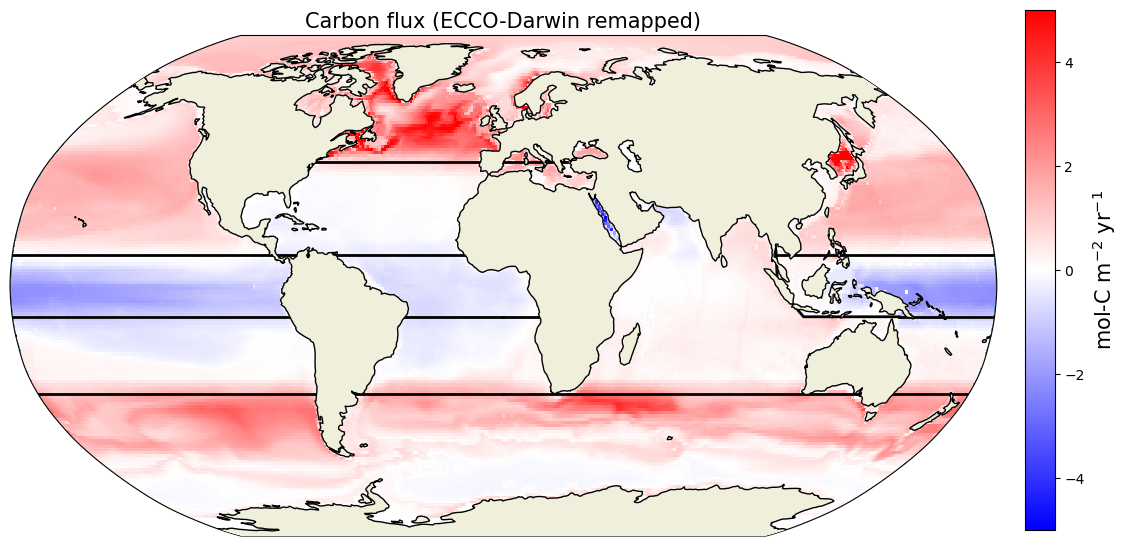

In [7]:
## Plot ECCO Darwin BSP binned flux

fig  = plt.figure(figsize = (15, 6.5))
gs = gridspec.GridSpec(1,1)
gs.update(wspace = 0.4, hspace=0)
fs=15

ax1 = plt.subplot(gs[0,0], projection=ccrs.Robinson(central_longitude=0))
minv, maxv = -5,5

ax1.stock_img()
ax1.coastlines(zorder=101)

## SECTIONS
# Pacific Sector
ax1.plot([145,300],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([145,300],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([100,280],[10,10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')

# Indian Sector
ax1.plot([25,145],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([145,110,100,100],[-10,-10,0,20], transform = ccrs.PlateCarree(), linewidth = 2, color='black')

# Atlantic Sector
ax1.plot([300,360],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([300,360],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([280,360],[10,10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([280,360],[40,40], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[40,40], transform = ccrs.PlateCarree(), linewidth = 2, color='black')


ax1.pcolormesh(LON, LAT, dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
plt.title('Carbon flux (ECCO-Darwin remapped)',fontsize=fs)
cax = fig.add_axes([0.86, 0.12, 0.02, 0.8])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)


#plt.savefig('ECCO_fluxes_remapped.png', bbox_inches='tight', dpi=300, transparent=True)

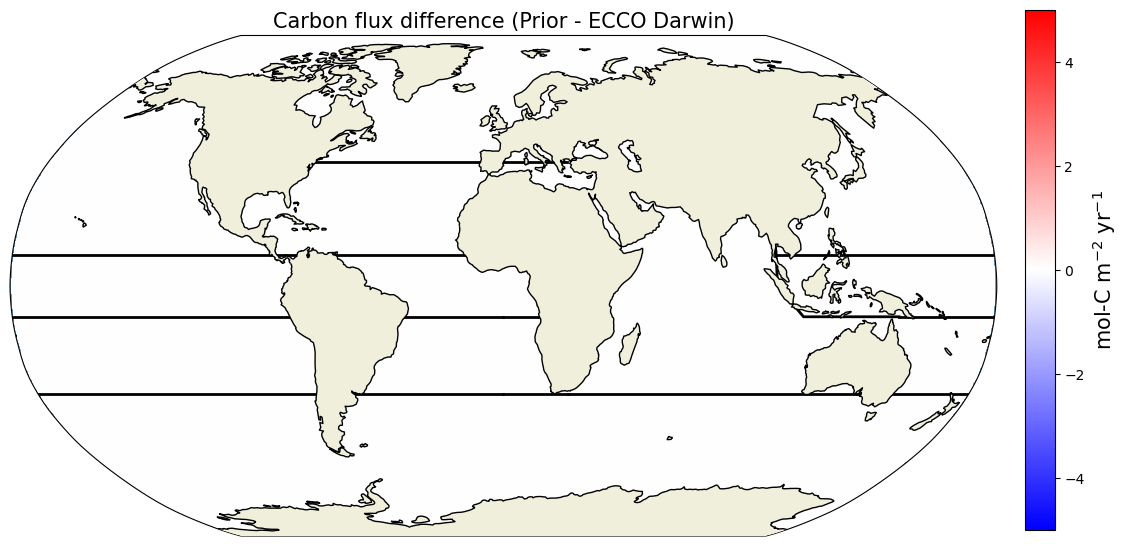

In [8]:
## Plot ECCO Darwin - prior

fig  = plt.figure(figsize = (15, 6.5))
gs = gridspec.GridSpec(1,1)
gs.update(wspace = 0.4, hspace=0)
fs=15

ax1 = plt.subplot(gs[0,0], projection=ccrs.Robinson(central_longitude=0))
minv, maxv = -5,5

ax1.stock_img()
ax1.coastlines(zorder=101)

## SECTIONS
# Pacific Sector
ax1.plot([145,300],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([145,300],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([100,280],[10,10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')

# Indian Sector
ax1.plot([25,145],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([145,110,100,100],[-10,-10,0,20], transform = ccrs.PlateCarree(), linewidth = 2, color='black')

# Atlantic Sector
ax1.plot([300,360],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([300,360],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([280,360],[10,10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([280,360],[40,40], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[40,40], transform = ccrs.PlateCarree(), linewidth = 2, color='black')


ax1.pcolormesh(LON, LAT, dC_prior_flux-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
plt.title('Carbon flux difference (Prior - ECCO Darwin)',fontsize=fs)
cax = fig.add_axes([0.86, 0.12, 0.02, 0.8])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)


#plt.savefig(OTMrun+'_ECCO_prior_diff.png', bbox_inches='tight', dpi=300, transparent=True)

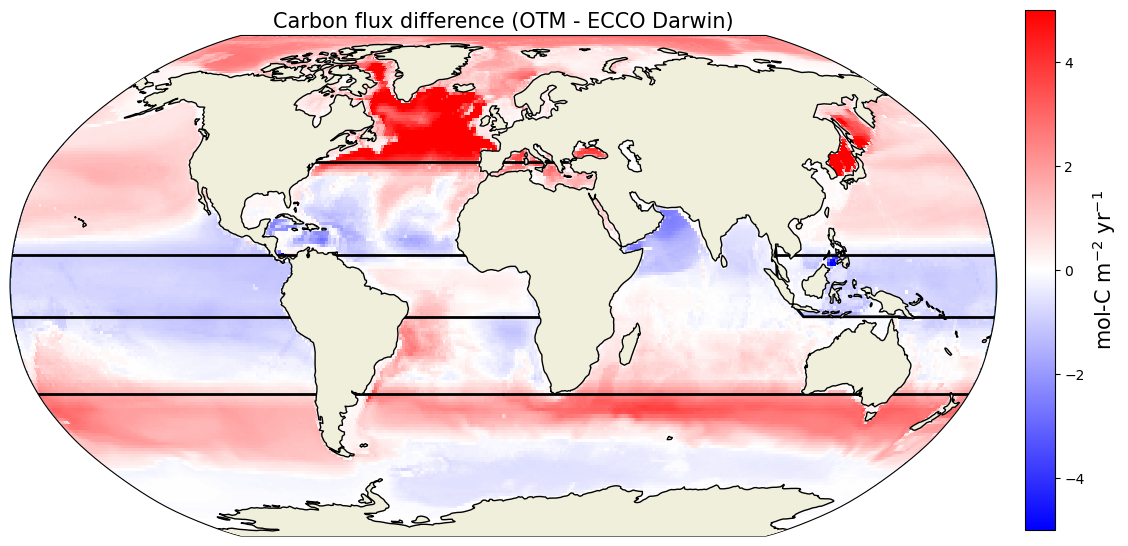

In [9]:
## Plot ECCO Darwin - OTM

fig  = plt.figure(figsize = (15, 6.5))
gs = gridspec.GridSpec(1,1)
gs.update(wspace = 0.4, hspace=0)
fs=15

ax1 = plt.subplot(gs[0,0], projection=ccrs.Robinson(central_longitude=0))
minv, maxv = -5,5

ax1.stock_img()
ax1.coastlines(zorder=101)

## SECTIONS
# Pacific Sector
ax1.plot([145,300],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([145,300],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([100,280],[10,10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')

# Indian Sector
ax1.plot([25,145],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([145,110,100,100],[-10,-10,0,20], transform = ccrs.PlateCarree(), linewidth = 2, color='black')

# Atlantic Sector
ax1.plot([300,360],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[-35,-35], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([300,360],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[-10,-10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([280,360],[10,10], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([280,360],[40,40], transform = ccrs.PlateCarree(), linewidth = 2, color='black')
ax1.plot([0,25],[40,40], transform = ccrs.PlateCarree(), linewidth = 2, color='black')


ax1.pcolormesh(LON, LAT, dC_OTM_flux-dC_Cflux_flux, transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
plt.title('Carbon flux difference (OTM - ECCO Darwin)',fontsize=fs)
cax = fig.add_axes([0.86, 0.12, 0.02, 0.8])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)


#plt.savefig(OTMrun+'_ECCO_OTM_diff.png', bbox_inches='tight', dpi=300, transparent=True)

In [10]:
# Calculate errors
RMS_ECCO_prior = np.sqrt(np.nansum((dC_Cflux_flux-dC_prior_flux)**2)/(~np.isnan(dC_Cflux_flux-dC_prior_flux)).sum())
RMS_ECCO_OTM = np.sqrt(np.nansum((dC_Cflux_flux-dC_OTM_flux)**2)/(~np.isnan(dC_Cflux_flux-dC_OTM_flux)).sum())
print(RMS_ECCO_prior)
print(RMS_ECCO_OTM)
print(np.nanmean(dC_prior_flux-dC_Cflux_flux))
print(np.nanmean(dC_OTM_flux-dC_Cflux_flux))

0.0
1.2400663460229868
0.0
0.42503966560463574


### Zonal mean sections

In [12]:
## Calculate basin masks and interpolate OTM basin data onto regular latitude grid

plot_sections=True

# Define basin masks

mask = xr.open_mfdataset('C:/Users/nm455/OneDrive - University of Exeter/UNICORNS/MTM/mask_regular.nc')

lat=OTM_remapped.YC.values.flatten()
lon=OTM_remapped.XC.values.flatten()

lon[np.where(lon<0)]=lon[np.where(lon<0)]+360

(LAT2,LON2)=np.meshgrid(np.arange(-90,90),np.arange(0,360))

# Atlantic

mask_2D=mask.mask.isel(k=0,Basins=[0,1,2,3,8])
mask_2D[4,:,:]=xr.where(np.logical_or(mask.lon>=290,mask.lon<=25),mask_2D[4,:,:],0)

mask_ATL=mask_2D.sum('Basins').expand_dims(dim={'k': mask.k},axis=2)
mask_ATL=xr.where(mask_ATL==0,np.nan,1)

# Pacific

mask_2D=mask.mask.isel(k=0,Basins=[5,6,7,8])
mask_2D[3,:,:]=xr.where(np.logical_and(mask.lon<290,mask.lon>140),mask_2D[3,:,:],0)

mask_PAC=mask_2D.sum('Basins').expand_dims(dim={'k': mask.k},axis=2)
mask_PAC=xr.where(mask_PAC==0,np.nan,1)

# Replace land with nan in OTM outputs

dC_adj_remapped=xr.where(OTM_remapped.maskC==1,OTM_remapped.dC_adj_remapped,np.nan)
dC_Cflux_remapped=xr.where(OTM_remapped.maskC==1,OTM_remapped.dC_Cflux_remapped,np.nan)
dC_mix_remapped=xr.where(OTM_remapped.maskC==1,OTM_remapped.dC_mix_remapped,np.nan)
dC_change_remapped=xr.where(OTM_remapped.maskC==1,OTM_remapped.dC_change_remapped,np.nan)

# Interpolate onto regular lat/lon grid

if plot_sections:

    dC_OTM_interp = np.zeros((360,180,50))
    dC_Cflux_interp = np.zeros((360,180,50))
    dC_mix_interp = np.zeros((360,180,50))
    dC_change_interp = np.zeros((360,180,50))

    for k in tqdm(mask.k.values):

#        dC_OTM_interp[:,:,k] = griddata((lon,lat),(dC_prior_remapped+dC_adj_remapped).isel(k=k).values.flatten(),(LON2,LAT2))
        dC_OTM_interp[:,:,k] = griddata((lon,lat),(dC_adj_remapped).isel(k=k).values.flatten(),(LON2,LAT2)) # No prior run
        dC_Cflux_interp[:,:,k] = griddata((lon,lat),(dC_Cflux_remapped).isel(k=k).values.flatten(),(LON2,LAT2))
        dC_mix_interp[:,:,k] = griddata((lon,lat),(dC_mix_remapped).isel(k=k).values.flatten(),(LON2,LAT2))
        dC_change_interp[:,:,k] = griddata((lon,lat),(dC_change_remapped).isel(k=k).values.flatten(),(LON2,LAT2))
      
    
    da_dC_OTM_interp = xr.DataArray(data = dC_OTM_interp, dims = ["i","j","k"])
    da_dC_mix_interp = xr.DataArray(data = dC_mix_interp, dims = ["i","j","k"])
    da_dC_Cflux_interp = xr.DataArray(data = dC_Cflux_interp, dims = ["i","j","k"])
    da_dC_change_interp = xr.DataArray(data = dC_change_interp, dims = ["i","j","k"])


    ECCO_OTM_interp=xr.Dataset()
    ECCO_OTM_interp['dC_OTM_interp'] = da_dC_OTM_interp
    ECCO_OTM_interp['dC_Cflux_interp'] = da_dC_Cflux_interp
    ECCO_OTM_interp['dC_mix_interp'] = da_dC_mix_interp
    ECCO_OTM_interp['dC_change_interp'] = da_dC_change_interp

    ECCO_OTM_interp.to_netcdf('OTM_interp.nc')



  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
## Plot zonal means of dC_adj, dC_mix and dC_Cflux in the Atlantic and Pacific together (full depth)

dC_mix_interp=xr.open_mfdataset('OTM_interp.nc').dC_mix_interp
dC_OTM_interp=xr.open_mfdataset('OTM_interp.nc').dC_OTM_interp
dC_Cflux_interp=xr.open_mfdataset('OTM_interp.nc').dC_Cflux_interp

fig, axes = plt.subplots(3,1,figsize=(20,10))

plt.subplots_adjust(wspace=0.1, hspace=0.3)

fs=9
ncols=100

minv1, maxv1 = -1, 1
minv2, maxv2 = -1, 1


# dC_mix

axes[0,0].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_mix_interp*mask_ATL/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv1, vmax=maxv1, cmap='Spectral_r')
axes[0,0].set_title('Atlantic mixing')
axes[0,0].invert_xaxis()

axes[0,1].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_mix_interp*mask_PAC/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv2, vmax=maxv2, cmap='Spectral_r')
axes[0,1].set_title('Pacific mixing')

# dC_adj

axes[1,0].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_OTM_interp*mask_ATL/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv1, vmax=maxv1, cmap='Spectral_r')
axes[1,0].set_title('Atlantic flux (OTM)')
axes[1,0].invert_xaxis()

axes[1,1].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_OTM_interp*mask_PAC/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv2, vmax=maxv2, cmap='Spectral_r')
axes[1,1].set_title('Pacific flux (OTM)')

# dC_Cflux

axes[2,0].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_Cflux_interp*mask_ATL/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv1, vmax=maxv1, cmap='Spectral_r')
axes[2,0].set_title('Atlantic flux (ECCO-Darwin)')
axes[2,0].invert_xaxis()

axes[2,1].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_Cflux_interp*mask_PAC/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv2, vmax=maxv2, cmap='Spectral_r')
axes[2,1].set_title('Pacific flux (ECCO-Darwin)')

axes[2,0].set_xlabel('Latitude')
axes[2,1].set_xlabel('Latitude')

axes[0,0].set_ylabel('Depth (m)')
axes[1,0].set_ylabel('Depth (m)')
axes[2,0].set_ylabel('Depth (m)')

cax = fig.add_axes([0.156, 0.02, 0.3, 0.015])
m = plt.cm.ScalarMappable(cmap='Spectral_r')
m.set_clim(minv1, maxv1)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$',fontsize=fs)

cax = fig.add_axes([0.570, 0.02, 0.3, 0.015])
m = plt.cm.ScalarMappable(cmap='Spectral_r')
m.set_clim(minv2, maxv2)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$',fontsize=fs)

if plot_sections:

    plt.savefig(OTMrun+'_combined_sections.png', bbox_inches='tight', dpi=300, transparent=True)

In [ ]:
## Plot zonal means of dC_adj, dC_mix and dC_Cflux in the Atlantic and Pacific together (top 1500m)

dC_mix_interp=xr.open_mfdataset('OTM_interp.nc').dC_mix_interp
dC_OTM_interp=xr.open_mfdataset('OTM_interp.nc').dC_OTM_interp
dC_Cflux_interp=xr.open_mfdataset('OTM_interp.nc').dC_Cflux_interp


fig, axes = plt.subplots(3,2,figsize=(20,10))

plt.subplots_adjust(wspace=0.1, hspace=0.3)

fs=9
ncols=100

minv1, maxv1 = -3, 3
minv2, maxv2 = -3, 3


# dC_mix

axes[0,0].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_mix_interp*mask_ATL/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv1, vmax=maxv1, cmap='Spectral_r')
axes[0,0].set_title('Atlantic mixing')
axes[0,0].invert_xaxis()
axes[0,0].set_ylim((-1500,0))

axes[0,1].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_mix_interp*mask_PAC/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv2, vmax=maxv2, cmap='Spectral_r')
axes[0,1].set_title('Pacific mixing')
axes[0,1].set_ylim((-1500,0))

# dC_adj

axes[1,0].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_OTM_interp*mask_ATL/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv1, vmax=maxv1, cmap='Spectral_r')
axes[1,0].set_title('Atlantic flux (OTM)')
axes[1,0].invert_xaxis()
axes[1,0].set_ylim((-1500,0))

axes[1,1].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_OTM_interp*mask_PAC/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv2, vmax=maxv2, cmap='Spectral_r')
axes[1,1].set_title('Pacific flux (OTM)')
axes[1,1].set_ylim((-1500,0))

# dC_Cflux

axes[2,0].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_Cflux_interp*mask_ATL/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv1, vmax=maxv1, cmap='Spectral_r')
axes[2,0].set_title('Atlantic flux (ECCO-Darwin)')
axes[2,0].invert_xaxis()
axes[2,0].set_ylim((-1500,0))

axes[2,1].contourf(np.arange(-90,90),OTM_remapped.Z,np.nanmean(dC_Cflux_interp*mask_PAC/(OTM_remapped.init_late.values-OTM_remapped.init_early.values),axis=0).transpose(), ncols, vmin=minv2, vmax=maxv2, cmap='Spectral_r')
axes[2,1].set_title('Pacific flux (ECCO-Darwin)')
axes[2,1].set_ylim((-1500,0))

axes[2,0].set_xlabel('Latitude')
axes[2,1].set_xlabel('Latitude')

axes[0,0].set_ylabel('Depth (m)')
axes[1,0].set_ylabel('Depth (m)')
axes[2,0].set_ylabel('Depth (m)')

cax = fig.add_axes([0.156, 0.02, 0.3, 0.015])
m = plt.cm.ScalarMappable(cmap='Spectral_r')
m.set_clim(minv1, maxv1)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$',fontsize=fs)

cax = fig.add_axes([0.570, 0.02, 0.3, 0.015])
m = plt.cm.ScalarMappable(cmap='Spectral_r')
m.set_clim(minv2, maxv2)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$',fontsize=fs)

if plot_sections:

    plt.savefig(OTMrun+'_combined_sections_1500m.png', bbox_inches='tight', dpi=300, transparent=True)